In [37]:
import os
import matplotlib.pyplot as plt
import shap

from config.constants import GIT_DIRECTORY
from regression.feature_importance import (
    prepare_full_model_shap,
    feature_superscript,
)
from regression.plots import format_title


def plot_shap_beeswarm_two_scores(
    task_name="picnicScene",
    targets=("PictureNamingScore", "SemanticFluencyScore"),
    shap_dir=None,
    max_display=20,
):
    if shap_dir is None:
        shap_dir = os.path.join(
            GIT_DIRECTORY,
            "results", "regression", "random_forest", "feature_importance",
        )

    # get explanations for both scores
    expls = {}
    for target in targets:
        shap_expl, shap_table, df_use, full_features, rf_params = \
            prepare_full_model_shap(task_name, target)
        if shap_expl is None:
            print(f"[SHAP] no explanation for {task_name} / {target}")
            return
        expls[target] = shap_expl

    # add superscripts
    def with_superscripts(expl):
        names = list(expl.feature_names)
        labels = [f"{n}{feature_superscript(n)}" for n in names]
        return shap.Explanation(
            values=expl.values,
            base_values=expl.base_values,
            data=expl.data,
            feature_names=labels,
        )

    expl1 = with_superscripts(expls[targets[0]])
    expl2 = with_superscripts(expls[targets[1]])

    # figure & axes
    fig, axes = plt.subplots(
        1, 2,
        figsize=(20, 7.0),
        gridspec_kw={"wspace": 1.5}
    )
    fig.patch.set_facecolor("white")

    # left panel
    plt.sca(axes[0])
    shap.plots.beeswarm(expl1, max_display=max_display, show=False)
    axes[0].set_title(
        format_title(targets[0]),
        x=0.01,
        pad=20,
        fontsize=14,
    )
    axes[0].set_xlabel("SHAP value", fontsize=12)

    # right panel
    plt.sca(axes[1])
    shap.plots.beeswarm(expl2, max_display=max_display, show=False)
    axes[1].set_title(
        format_title(targets[1]),
        x=0.01,
        pad=20,
        fontsize=14,
    )
    axes[1].set_xlabel("SHAP value", fontsize=12)

    # feature label size
    for ax in axes:
        ax.tick_params(labelsize=12)

    # superscript legend
    fig.text(
        0.08, 0.04,
        "¹ linguistic   ² acoustic   ³ demographics",
        ha="right", va="top", fontsize=12, fontfamily="Arial"
    )

    plt.tight_layout(rect=[0.05, 0.14, 0.98, 0.96])

    out_dir = os.path.join(shap_dir, "multi_score_beeswarm", task_name)
    os.makedirs(out_dir, exist_ok=True)
    out_path = os.path.join(
        out_dir,
        f"{task_name}_{targets[0]}_{targets[1]}_beeswarm_side_by_side.png"
    )
    plt.savefig(out_path, dpi=600, bbox_inches="tight")
    # plt.close()
    print("[SHAP] saved side-by-side beeswarm to:", out_path)


 93%|=================== | 184/197 [00:12<00:00]       /var/folders/py/1h2n_yxd7l9dts6tjm4v1tpr0000gn/T/ipykernel_41348/1945035039.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.14, 0.98, 0.96])


[SHAP] saved side-by-side beeswarm to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/random_forest/feature_importance/multi_score_beeswarm/picnicScene/picnicScene_PictureNamingScore_SemanticFluencyScore_beeswarm_side_by_side.png


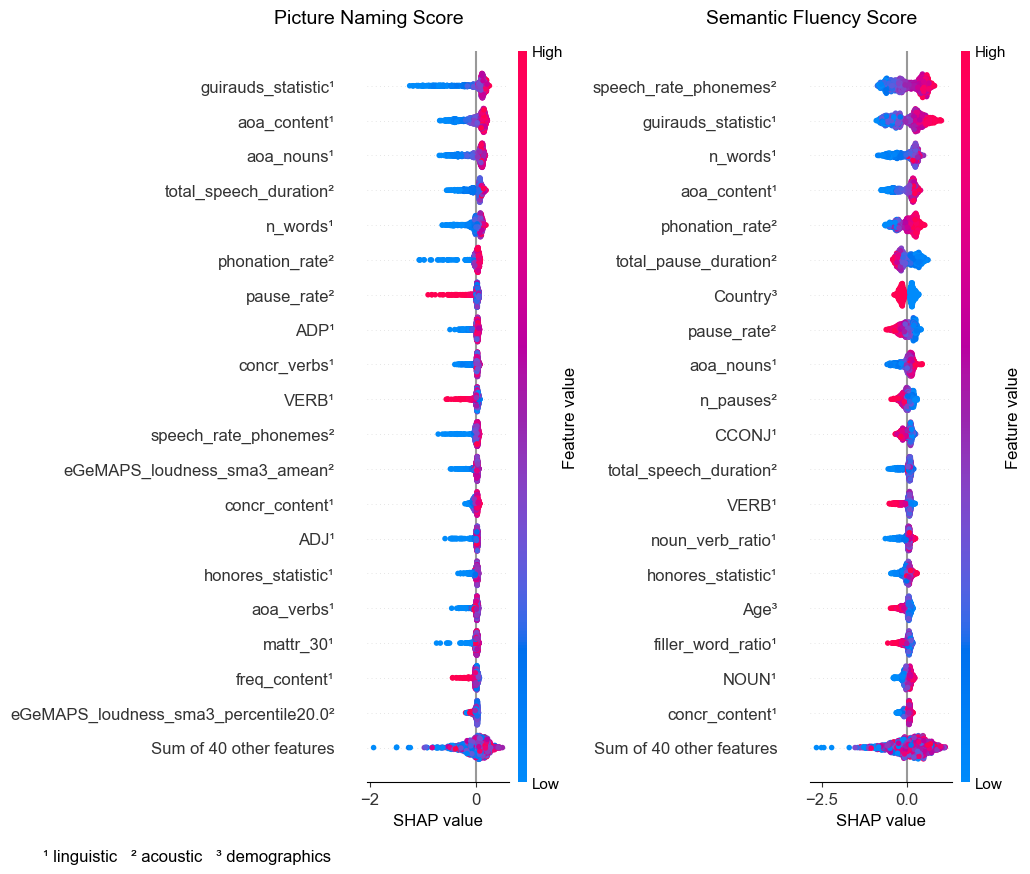

In [38]:
plot_shap_beeswarm_two_scores(
    task_name="picnicScene",
    targets=("PictureNamingScore", "SemanticFluencyScore"),
    max_display=20
)